# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [118]:
import pandas as pd

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [119]:
df = pd.read_csv('pelanggan.csv')
df.head()

,Customer_ID,Age,Gender,City,Annual_Income,Purchase_Frequency,Average_Spending_Per_Transaction,Preferred_Product_Category,Total_Spent
0,CUST-0001,58,Male,Bandung,74452590,20,2506379,Electronics,50127580
1,CUST-0002,25,Male,Makassar,20948354,2,1034739,Electronics,2069478
2,CUST-0003,19,Male,Surabaya,187117265,2,2054445,Health & Beauty,4108890
3,CUST-0004,65,Male,Jakarta,87943960,8,2085052,Electronics,16680416
4,CUST-0005,35,Female,Jakarta,23276996,9,2871946,Health & Beauty,25847514


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

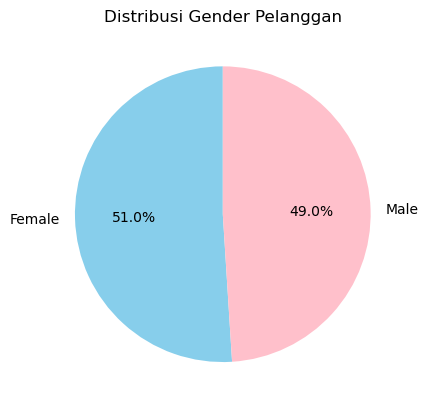

In [120]:
# Pie chart distribusi gender pelanggan
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts,
        labels = gender_counts.index,
        autopct = '%1.1f%%',
        colors = ['skyblue', 'pink'],
        startangle = 90)
plt.title('Distribusi Gender Pelanggan')
plt.show()

C:\Users\rapsa\AppData\Local\Temp\ipykernel_47988\1187210204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,


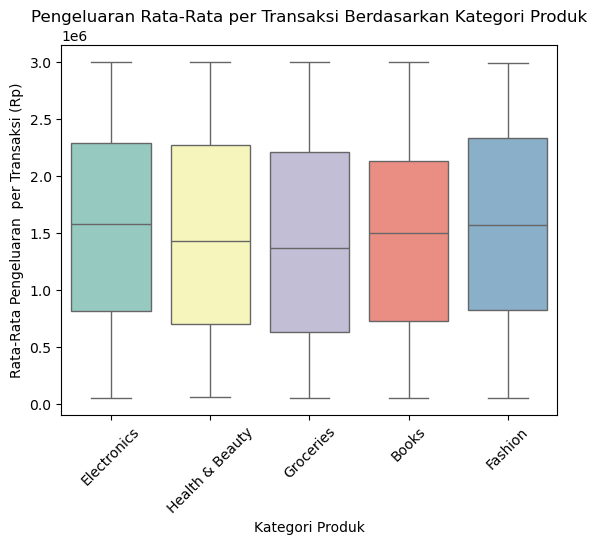

In [121]:
# BOXPLOT pengeluaran rata-rata per transaksi berdasarkan kategori produk
sns.boxplot(data = df,
            x = 'Preferred_Product_Category',
            y = 'Average_Spending_Per_Transaction',
            palette = 'Set3')
plt.title('Pengeluaran Rata-Rata per Transaksi Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Rata-Rata Pengeluaran  per Transaksi (Rp)')
plt.xticks(rotation = 45)
plt.show()

C:\Users\rapsa\AppData\Local\Temp\ipykernel_47988\4107427343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df,


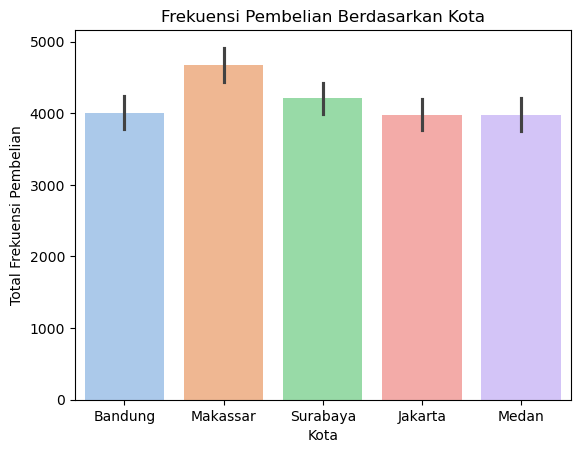

In [122]:
# Frekuensi Pembelian berdasarkan kota
sns.barplot(data = df,
            x = 'City',
            y = 'Purchase_Frequency',
            estimator = sum,
            palette = 'pastel')
plt.title('Frekuensi Pembelian Berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Total Frekuensi Pembelian')
plt.show()

C:\Users\rapsa\AppData\Local\Temp\ipykernel_47988\2638495449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,


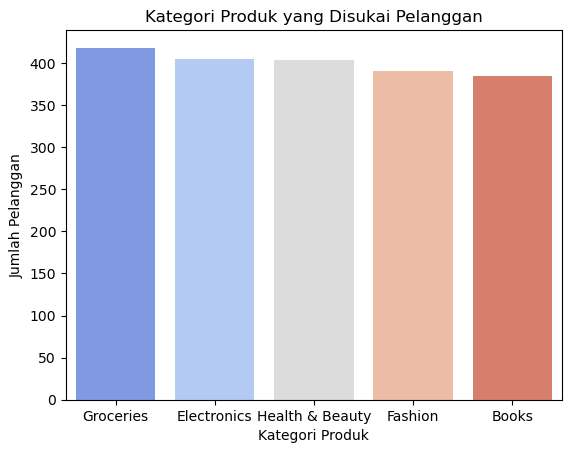

In [123]:
# Bar Plot Kategori produk yang disukai
sns.countplot(data = df,
              x = 'Preferred_Product_Category',
              order = df['Preferred_Product_Category'].value_counts().index,
              palette = 'coolwarm')
plt.title('Kategori Produk yang Disukai Pelanggan')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pelanggan')
plt.show()

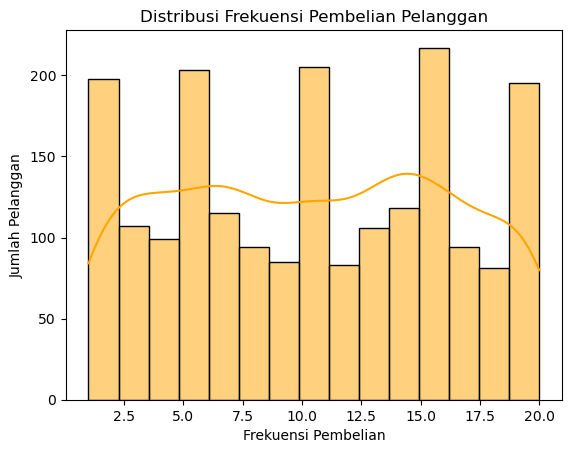

In [124]:
# Distribusi Frekuensi pembelian pelanggan
sns.histplot(df['Purchase_Frequency'],
             kde = True,
             color = 'orange',
             bins = 15)
plt.title('Distribusi Frekuensi Pembelian Pelanggan')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [125]:
#Type your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID Nasabah         2000 non-null   int64  
 1   Usia               2000 non-null   int64  
 2   Jenis Kelamin      2000 non-null   object 
 3   Status Merokok     2000 non-null   object 
 4   BMI                2000 non-null   float64
 5   Jumlah Klaim       2000 non-null   int64  
 6   Total Biaya Klaim  2000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 109.5+ KB


In [126]:
data.describe()

,ID Nasabah,Usia,BMI,Jumlah Klaim,Total Biaya Klaim
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,1000.500000,43.853500,26.618100,2.539000,1.416134e+07
std,577.494589,15.201631,4.744091,1.738387,1.266773e+07
min,1.000000,18.000000,18.500000,0.000000,0.000000e+00
25%,500.750000,31.000000,22.400000,1.000000,4.350087e+06
50%,1000.500000,44.000000,26.600000,3.000000,1.075985e+07
75%,1500.250000,57.000000,30.800000,4.000000,2.164123e+07
max,2000.000000,70.000000,35.000000,5.000000,4.997630e+07


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [127]:
# Memilih fitur untuk clustering
features = ['Annual_Income',
            'Purchase_Frequency',
            'Average_Spending_Per_Transaction',
            'Total_Spent']

In [128]:
# Standarisasi Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [129]:
# Menentukan jumlah cluster menggunakan metode elbow
inertia = []
k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

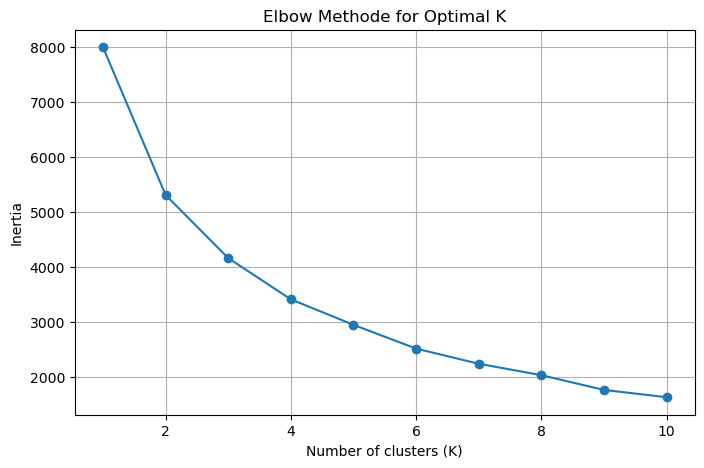

In [130]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker = 'o')
plt.title('Elbow Methode for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [131]:
# Menggunakan jumlah cluster optimal
optimal_k = 4 # Berdasarkan elbow method (misalnya)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [132]:
# Mengurangi dimensi data untuk visualisasi
pca = PCA(n_components = 2)
reduced_features = pca.fit_transform(scaled_features)

In [133]:
# Warna untuk setiap cluster
colors = ['blue', 'green', 'red', 'purple']

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

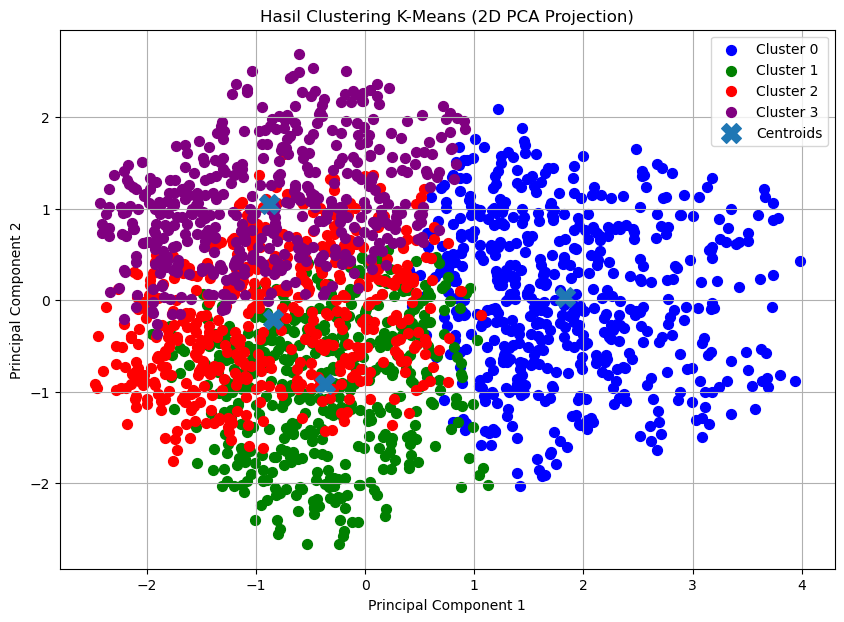

In [134]:
# Plot hasil clustering
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k) :
    cluster_points = reduced_features[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], 
                cluster_points[:, 1],
                s = 50,
                label = f'Cluster {cluster}',
                color = colors[cluster])
    
# Menambahkan centroid pada ploy
centroids_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0], 
            centroids_reduced[:, 1],
            s = 200,
            marker = 'X',
            label = 'Centroids')

# Menambahkan detail plot
plt.title('Hasil Clustering K-Means (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [135]:
features

['Annual_Income',
 'Purchase_Frequency',
 'Average_Spending_Per_Transaction',
 'Total_Spent']

In [136]:
df.head()

,Customer_ID,Age,Gender,City,Annual_Income,Purchase_Frequency,Average_Spending_Per_Transaction,Preferred_Product_Category,Total_Spent,Cluster
0,CUST-0001,58,Male,Bandung,74452590,20,2506379,Electronics,50127580,0
1,CUST-0002,25,Male,Makassar,20948354,2,1034739,Electronics,2069478,3
2,CUST-0003,19,Male,Surabaya,187117265,2,2054445,Health & Beauty,4108890,2
3,CUST-0004,65,Male,Jakarta,87943960,8,2085052,Electronics,16680416,3
4,CUST-0005,35,Female,Jakarta,23276996,9,2871946,Health & Beauty,25847514,0


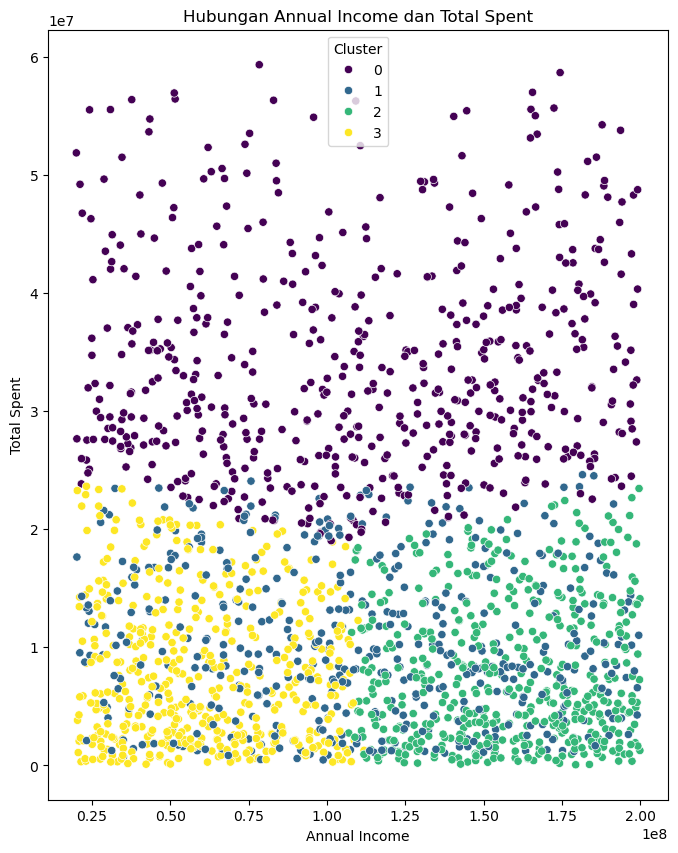

In [137]:
plt.figure(figsize = (8,10))
sns.scatterplot(data = df,
                x = 'Annual_Income',
                y = 'Total_Spent',
                hue = 'Cluster',
                palette='viridis')
plt.title('Hubungan Annual Income dan Total Spent')
plt.xlabel('Annual Income')
plt.ylabel('Total Spent')
plt.show()

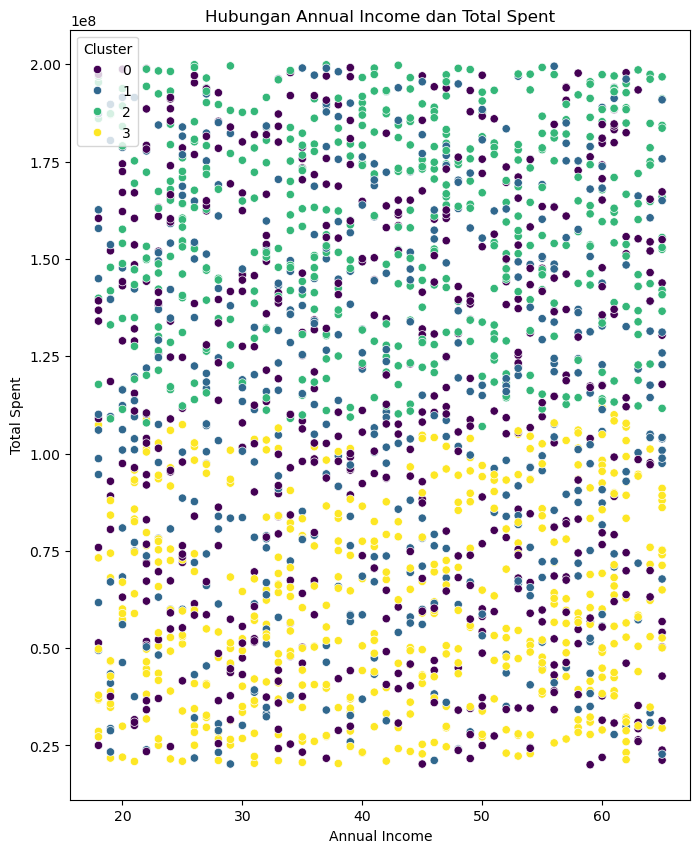

In [138]:
plt.figure(figsize = (8,10))
sns.scatterplot(data = df,
                x = 'Age',
                y = 'Annual_Income',
                hue = 'Cluster',
                palette='viridis')
plt.title('Hubungan Annual Income dan Total Spent')
plt.xlabel('Annual Income')
plt.ylabel('Total Spent')
plt.show()

Tulis hasil interpretasinya di sini.
- Cluster 0
    - Usia Rata-rata: 41 tahun
    - Pendapatan Tahunan: Rp110 juta
    - Frekuensi Pembelian: 15 kali per tahun
    - Pengeluaran Rata-rata per Transaksi: Rp2,29 juta
    - Total Pengeluaran: Rp33,99 juta
    - Kategori Produk Favorit: Electronics
    - Gender Dominan: Male
    - Kota Dominan: Bandung
- Cluster 1
    - Usia Rata-rata: 41 tahun
    - Pendapatan Tahunan: Rp112 juta
    - Frekuensi Pembelian: 15 kali per tahun
    - Pengeluaran Rata-rata per Transaksi: Rp685 ribu
    - Total Pengeluaran: Rp10,39 juta
    - Kategori Produk Favorit: Groceries
    - Gender Dominan: Male
    - Kota Dominan: Makassar
- Cluster 2
    - Usia Rata-rata: 42 tahun
    - Pendapatan Tahunan: Rp157 juta
    - Frekuensi Pembelian: 5 kali per tahun
    - Pengeluaran Rata-rata per Transaksi: Rp1,48 juta
    - Total Pengeluaran: Rp7,86 juta
    - Kategori Produk Favorit: Groceries
    - Gender Dominan: Female
    - Kota Dominan: Surabaya
- Cluster 3
    - Usia Rata-rata: 42 tahun
    - Pendapatan Tahunan: Rp60 juta
    - Frekuensi Pembelian: 5 kali per tahun
    - Pengeluaran Rata-rata per Transaksi: Rp1,43 juta
    - Total Pengeluaran: Rp7,86 juta
    - Kategori Produk Favorit: Health & Beauty
    - Gender Dominan: Female
    - Kota Dominan: Makassar

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [139]:
# Mengekspor DataFrame ke file CSV
df.to_csv('df_new.csv', index=False)

print("Dataset berhasil diekspor ke 'df_new.csv'")

Dataset berhasil diekspor ke 'df_new.csv'
